# Forecasting of Google Stock Data Analysis

## Import

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import yfinance as yf

import datetime as dt
from datetime import date, timedelta
import plotly.graph_objects as ga
import plotly.express as px
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

### Import Dataset

In [2]:
date.today()

datetime.date(2024, 7, 2)

In [3]:
today  =  date.today()
d1  = today.strftime("%Y-%m-%d")
end_date  =  d1
d2  = date.today() - timedelta(days=1000)
d2  =  d2.strftime("%Y-%m-%d")
start_date = d2

print('Data is starts from','',start_date,'','to','', end_date)

Data is starts from  2021-10-06  to  2024-07-02


In [4]:
ticker = 'GOOG'

df = yf.download(ticker, start=start_date, end=end_date, progress=False)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-06,134.625504,137.852005,134.486496,137.354004,137.197876,19764000
2021-10-07,138.863007,140.154449,138.563004,139.185501,139.027298,18250000
2021-10-08,139.906006,140.317001,139.429352,140.056000,139.896805,18924000
2021-10-11,139.800003,140.763657,138.806503,138.847504,138.689682,16584000
2021-10-12,139.637497,139.695007,136.250000,136.712997,136.557602,22536000


## EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 687 entries, 2021-10-06 to 2024-07-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       687 non-null    float64
 1   High       687 non-null    float64
 2   Low        687 non-null    float64
 3   Close      687 non-null    float64
 4   Adj Close  687 non-null    float64
 5   Volume     687 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 37.6 KB


In [6]:
df.insert(0, 'Date', df.index, True)
#df['Date'] = df.index               ### Another way to add date coumn in Dataset
df.reset_index(drop=True, inplace=True) 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       687 non-null    datetime64[ns]
 1   Open       687 non-null    float64       
 2   High       687 non-null    float64       
 3   Low        687 non-null    float64       
 4   Close      687 non-null    float64       
 5   Adj Close  687 non-null    float64       
 6   Volume     687 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 37.7 KB


In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-10-06,134.625504,137.852005,134.486496,137.354004,137.197876,19764000
1,2021-10-07,138.863007,140.154449,138.563004,139.185501,139.027298,18250000
2,2021-10-08,139.906006,140.317001,139.429352,140.056000,139.896805,18924000
3,2021-10-11,139.800003,140.763657,138.806503,138.847504,138.689682,16584000
4,2021-10-12,139.637497,139.695007,136.250000,136.712997,136.557602,22536000


In [9]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,687,687.000000,687.000000,687.000000,687.000000,687.000000,6.870000e+02
mean,2023-02-16 08:00:00,127.061490,128.598510,125.701093,127.169994,127.029928,2.556483e+07
min,2021-10-06 00:00:00,85.510002,86.550003,83.449997,83.489998,83.395096,8.567800e+06
25%,2022-06-11 12:00:00,107.967503,109.605000,106.564026,108.365002,108.241829,1.865555e+07
50%,2023-02-16 00:00:00,129.985001,131.449997,128.190002,129.660507,129.513123,2.292800e+07
75%,2023-10-23 12:00:00,141.384003,142.831879,139.901245,141.569748,141.408836,2.952945e+07
max,2024-07-01 00:00:00,185.720001,187.500000,185.449997,186.860001,186.860001,9.779860e+07
std,NaN,22.456907,22.449976,22.400653,22.463529,22.448706,1.044143e+07


In [10]:
fig  = px.line(df, x='Date', y=df.columns, title='Google Stock Price ')
fig.show()

In [11]:
df = df[['Date', 'Close']]  
df.head()

,Date,Close
0,2021-10-06,137.354004
1,2021-10-07,139.185501
2,2021-10-08,140.056000
3,2021-10-11,138.847504
4,2021-10-12,136.712997


In [12]:
fig  = px.line(df, x='Date', y='Close', title='Google Stock Price ')
fig.show()
df.describe()

,Date,Close
count,687,687.000000
mean,2023-02-16 08:00:00,127.169994
min,2021-10-06 00:00:00,83.489998
25%,2022-06-11 12:00:00,108.365002
50%,2023-02-16 00:00:00,129.660507
75%,2023-10-23 12:00:00,141.569748
max,2024-07-01 00:00:00,186.860001
std,NaN,22.463529


### Stationarity Checking

In [13]:
def adf_test(df):
    result = adfuller(df)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1]<= 0.05:
        print('Reject Null Hypthesis, Data is Stationarity. We can use ARIMA Model')
    else:
        print('Fail to Reject Null Hypthesis, Data is not Stationarity. We cannot use ARIMA Model')

adf_test(df['Date'])

ADF Statistic: 11.131751449405689
p-value: 1.0
Fail to Reject Null Hypthesis, Data is not Stationarity. We cannot use ARIMA Model


### Seasonal Decomposition

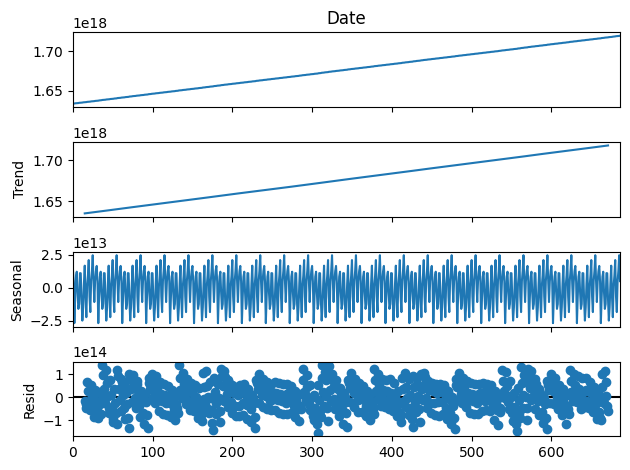

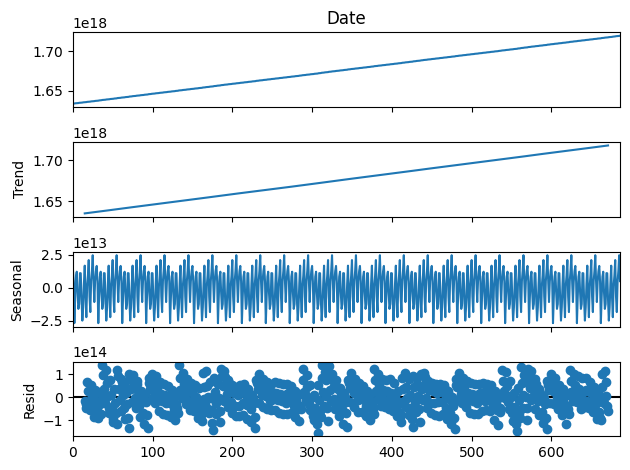

In [14]:
decompose = seasonal_decompose(df['Date'], model='additive', period=30)
decompose.plot()

### Find d-value

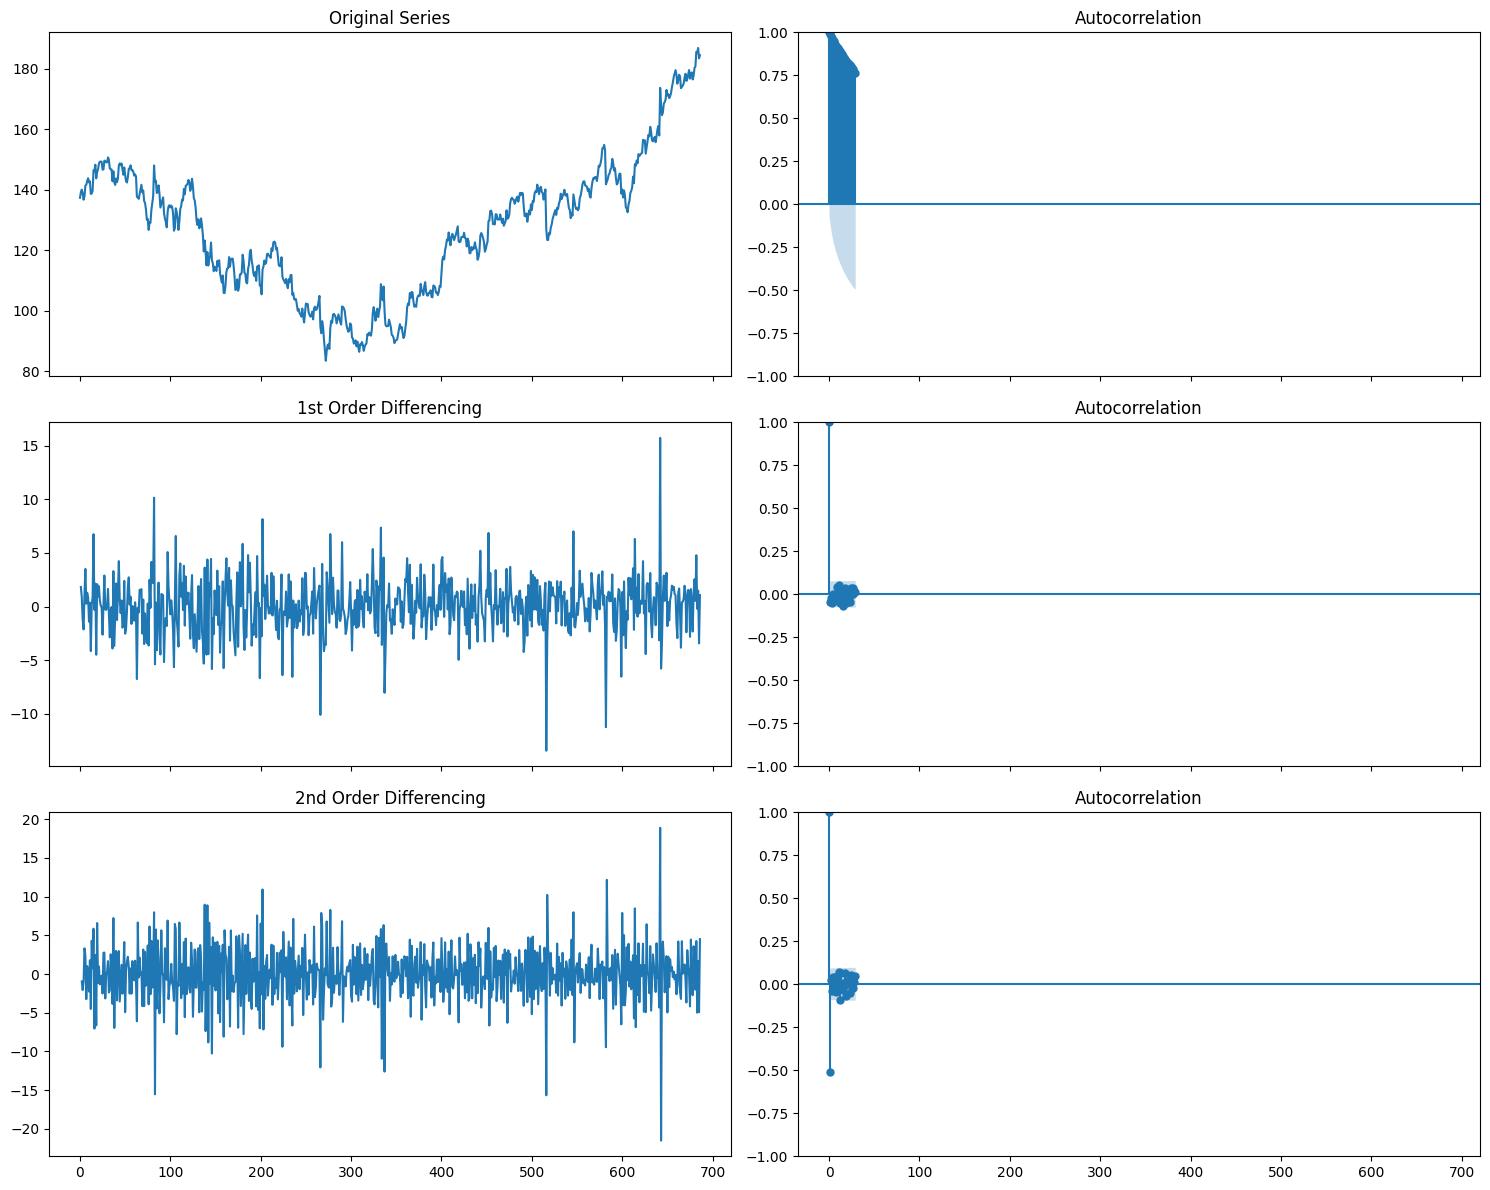

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(3, 2, figsize=(15, 12), sharex=True)

# Original Series
axes[0, 0].plot(df['Close'])
axes[0, 0].set_title('Original Series')
plot_acf(df['Close'], ax=axes[0, 1])

# First Differencing
first_diff = df['Close'].diff().dropna()
axes[1, 0].plot(first_diff)
axes[1, 0].set_title('1st Order Differencing')
plot_acf(first_diff, ax=axes[1, 1])

# Second Differencing
second_diff = first_diff.diff().dropna()
axes[2, 0].plot(second_diff)
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(second_diff, ax=axes[2, 1])

plt.tight_layout()
plt.show()


'd = 1'

### Find p-value

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

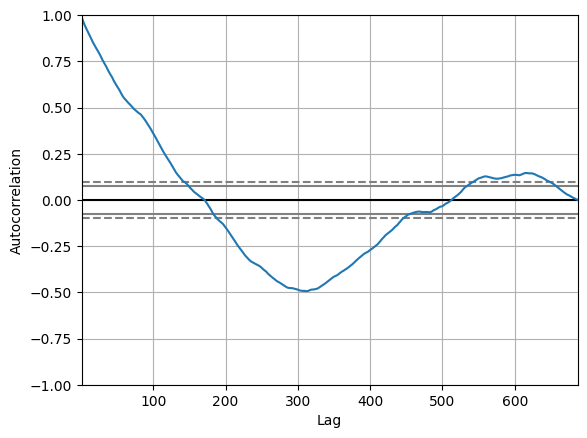

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pd.plotting.autocorrelation_plot(df['Close'])

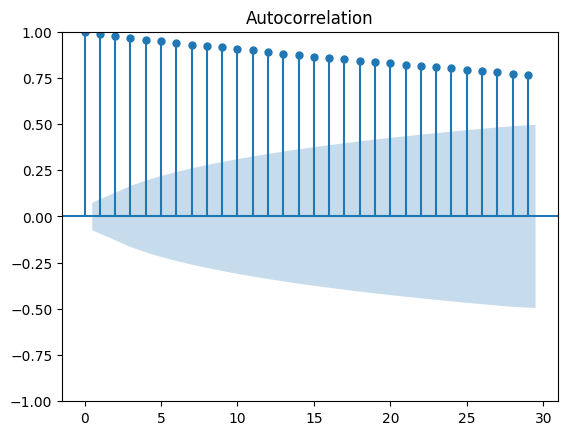

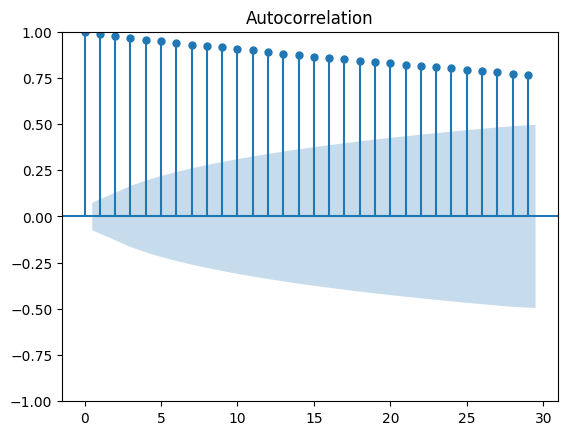

In [17]:
plot_acf(df['Close'], alpha=0.05)

In [18]:
from statsmodels.tsa.stattools import acf, pacf
x_acf = pd.DataFrame(acf(df['Close']))
print(x_acf)

           0
0   1.000000
1   0.988726
2   0.978124
3   0.967182
4   0.957136
5   0.947086
6   0.938268
7   0.929925
8   0.922084
9   0.914779
10  0.906519
11  0.898173
12  0.889392
13  0.880938
14  0.872306
15  0.864232
16  0.856897
17  0.849508
18  0.842339
19  0.835115
20  0.828552
21  0.821998
22  0.815336
23  0.808268
24  0.801673
25  0.794854
26  0.788112
27  0.780400
28  0.772298


'p = 2'

### Find q-value

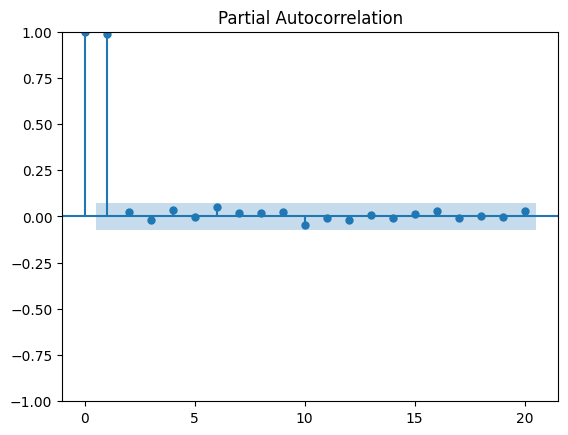

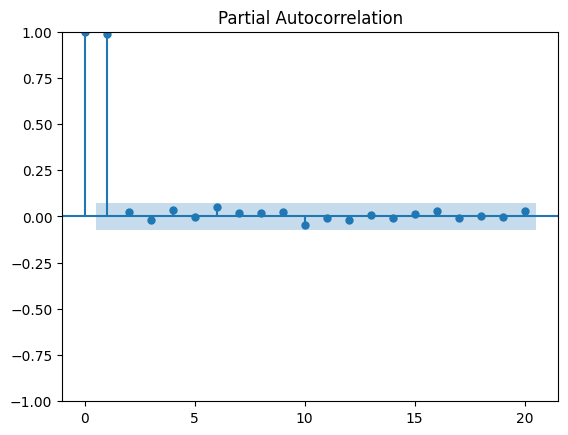

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(df['Close'],  lags=20, alpha=0.05)

''q = 2''

In [20]:
q = 2
p = 2
d = 1

## Forecasting

### Auto_ARIMA Fitting

In [21]:
from pmdarima.arima import auto_arima

model = auto_arima(df['Close'], start_P=1, start_q=1, max_p=2, max_q=2, seasonal=True, d=1, D=1, trace=True, error_action='ignore',suppress_warnings=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3229.132, Time=0.75 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3227.715, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3228.398, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3228.332, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3226.218, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3227.136, Time=0.46 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.565 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  687
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1612.109
Date:                Tue, 02 Jul 2024   AIC                           3226.218
Time:                        22:48:17   BIC                           3230.749
Sample:                             0   HQIC                          3227.971
          

##### A different way to predict 

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  687
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1612.109
Date:                Tue, 02 Jul 2024   AIC                           3226.218
Time:                        22:48:19   BIC                           3230.749
Sample:                             0   HQIC                          3227.971
                                - 687                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         6.4375      0.198     32.458      0.000       6.049       6.826
Ljung-Box (L1) (Q):                   1.32   Jarque-Bera (JB):               492.76
Prob(Q):                              0.25   Pr

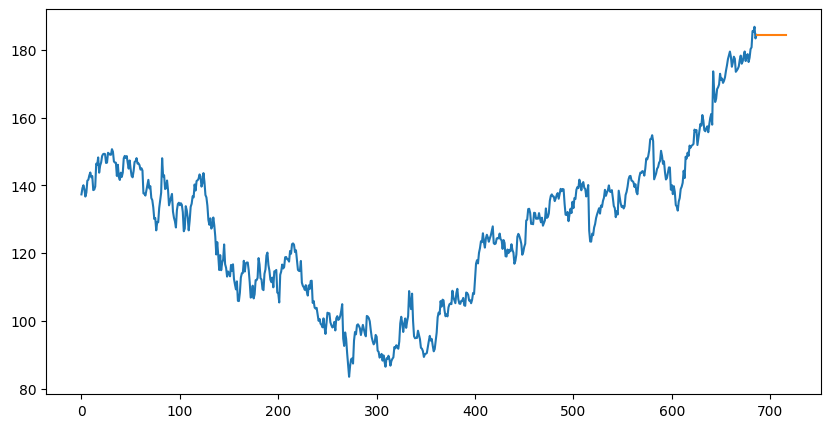

In [22]:
model = auto_arima(df['Close'], seasonal=True, suppress_warnings=True)
print(model.summary())

# Predict Forecast
forecast = model.predict(n_periods = 30)
print(forecast)

# Plot the forecast
plt.figure(figsize=[10, 5])
plt.plot(df['Close'], label='Actual')
plt.plot(forecast, label='Predicted')

In [23]:
## ARIMA is used when there are no seasonal, but we have seasonal so we woud use SARIMA or SARIMAX
"""from statsmodels.tsa.arima.model import ARIMA
p, d ,q = 2, 1, 2

model = ARIMA(df['Close'], order=(p,d,q))
model = model.fit()
print(model.summary())
# Predict Forecast
forecast = model.predict(len(df['Close']), len(df['Close'])+30 )
print(forecast)

# Plot the forecast
plt.figure(figsize=[10, 5])
plt.plot(df['Close'], label='Actual')
plt.plot(forecast, label='Predicted')"""

"from statsmodels.tsa.arima.model import ARIMA\np, d ,q = 2, 1, 2\n\nmodel = ARIMA(df['Close'], order=(p,d,q))\nmodel = model.fit()\nprint(model.summary())\n# Predict Forecast\nforecast = model.predict(len(df['Close']), len(df['Close'])+30 )\nprint(forecast)\n\n# Plot the forecast\nplt.figure(figsize=[10, 5])\nplt.plot(df['Close'], label='Actual')\nplt.plot(forecast, label='Predicted')"

##### A different way to predict 

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  687
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1612.109
Date:                Tue, 02 Jul 2024   AIC                           3226.218
Time:                        22:48:21   BIC                           3230.749
Sample:                             0   HQIC                          3227.971
                                - 687                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         6.4375      0.198     32.458      0.000       6.049       6.826
Ljung-Box (L1) (Q):                   1.32   Jarque-Bera (JB):               492.76
Prob(Q):                              0.25   Pr

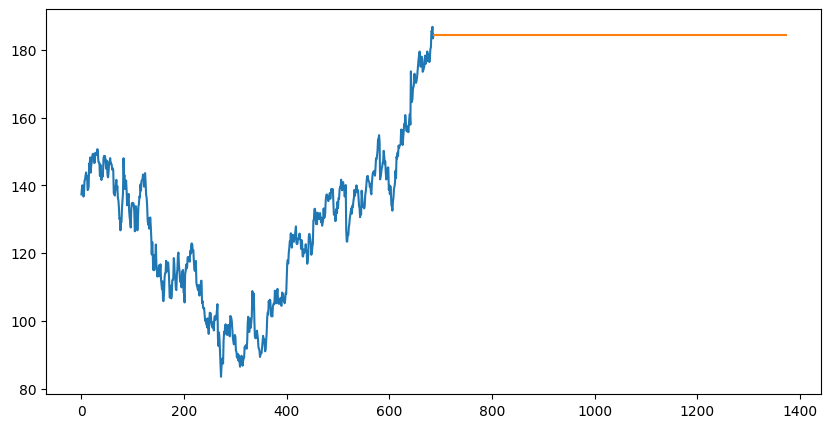

In [24]:
model = auto_arima(df['Close'], seasonal=True, suppress_warnings=True)
print(model.summary())

# Predict Forecast
forecast = model.predict(len(df['Close']), len(df['Close'])+30 )
print(forecast)

# Plot the forecast
plt.figure(figsize=[10, 5])
plt.plot(df['Close'], label='Actual')
plt.plot(forecast, label='Predicted')

### SARIMAX Fitting

In [25]:
import statsmodels.api as sm
import warnings

In [26]:
p,d, q = 2,1,2
model =sm.tsa.statespace.SARIMAX(df['Close'],
                                  order=(p,d,q), 
                                  seasonal_order=(p,d,q, 12))
model_fit = model.fit()
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  687
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood               -1605.169
Date:                            Tue, 02 Jul 2024   AIC                           3228.337
Time:                                    22:48:40   BIC                           3268.956
Sample:                                         0   HQIC                          3244.066
                                            - 687                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2175      0.189     -1.152      0.249      -0.588       0.153
ar.L2          0.7495      0.184   

### Predictions

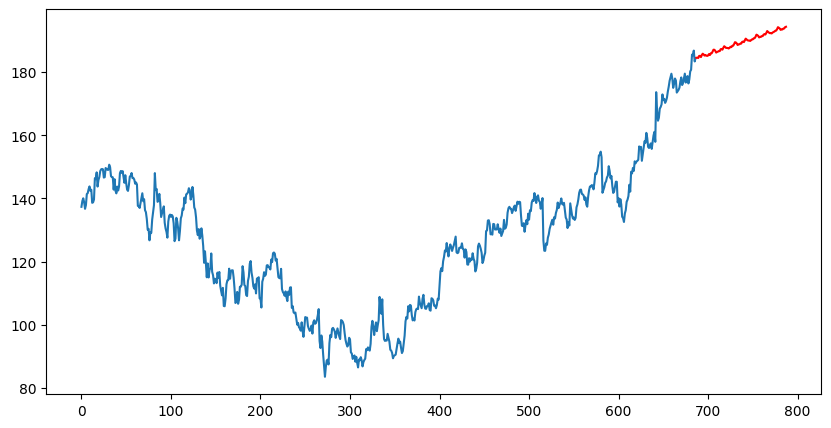

In [27]:
predictions = model_fit.predict(start=len(df['Close']), end=len(df['Close'])+100)

# Plot the forecast
plt.figure(figsize=[10, 5])
plt.plot(df['Close'], label='Actual')
plt.plot(predictions, color='red', label='Predicted')



In [28]:
predictions = model_fit.predict(start=len(df['Close']), end=len(df['Close'])+10)
print(predictions)

687    184.589739
688    184.613297
689    184.522436
690    185.176679
691    185.188554
692    184.813578
693    185.484860
694    185.883290
695    185.638602
696    185.284175
697    185.468355
Name: predicted_mean, dtype: float64
